<a href="https://colab.research.google.com/github/Sumitkevlani/End-to-End-ML-projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**Loading the Dataset**

In [11]:
car_dataset = pd.read_csv('car_data.csv')

In [4]:
car_dataset.shape

(301, 9)

In [5]:
#checking for missing numbers
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [7]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#performing data encoding
car_dataset = car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Transmission':{'Manual':0,'Automatic':1},'Seller_Type':{'Dealer':0,'Individual':1}})

In [13]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


**Separating the data and the labels**

In [38]:
#splitting the data into training and test section
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [15]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

**Model Training using Linear Regression**

In [17]:
#training the model
linearRegression = LinearRegression()

In [18]:
linearRegression.fit(X_train,Y_train)

LinearRegression()

In [20]:
X_train_prediction = linearRegression.predict(X_train)

**Calculating the R Squared Error and the Mean Absolute Error**

In [21]:
#calculating the accuracy of the model on the training data
rsquared_error = metrics.r2_score(X_train_prediction,Y_train)
print(rsquared_error)

0.8685439505823428


In [22]:
mean_abs_error = metrics.mean_absolute_error(X_train_prediction,Y_train)
print(mean_abs_error)

1.1998520242148687


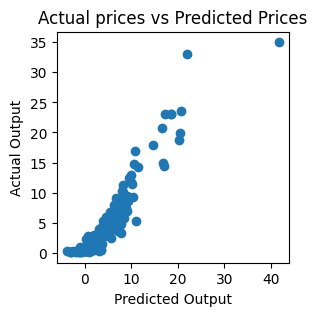

In [25]:
#printing a scatter plot for the actual and predicted outputs
plt.figure(figsize=(3,3))
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [27]:
X_test_predict = linearRegression.predict(X_test)
test_r2_error = metrics.r2_score(X_test_predict,Y_test)
test_mean_abs_error = metrics.mean_absolute_error(X_test_predict,Y_test)
print('R squared error for the test data:',test_r2_error)
print('Mean absolute error for the test data:',test_mean_abs_error)

R squared error for the test data: 0.8193296211105912
Mean absolute error for the test data: 1.2671998472919161


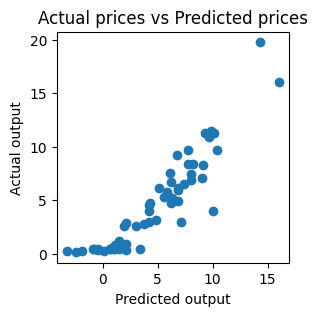

In [30]:
plt.figure(figsize=(3,3))
plt.scatter(X_test_predict,Y_test)
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.title('Actual prices vs Predicted prices')
plt.show()

**Model training Using Lasso Regression**

In [31]:
#training the model with Lasso Regression
lassoRegression = Lasso()
lassoRegression.fit(X_train,Y_train)

Lasso()

In [32]:
X_train_predicted = lassoRegression.predict(X_train)

**Calculating the R squared Error and the Mean Absolute Error**

In [33]:
#calculating the accuracy of the model on the training data
rsquared_error = metrics.r2_score(X_train_predicted,Y_train)
print(rsquared_error)

0.7999397993548054


In [34]:
mean_abs_error = metrics.mean_absolute_error(X_train_predicted,Y_train)
print(mean_abs_error)

1.2810306200223531


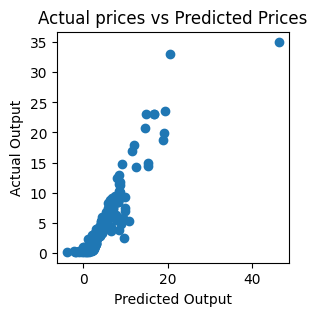

In [35]:
#printing a scatter plot for the actual and predicted outputs
plt.figure(figsize=(3,3))
plt.scatter(X_train_predicted,Y_train)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [36]:
X_test_predict = lassoRegression.predict(X_test)
test_r2_error = metrics.r2_score(X_test_predict,Y_test)
test_mean_abs_error = metrics.mean_absolute_error(X_test_predict,Y_test)
print('R squared error for the test data:',test_r2_error)
print('Mean absolute error for the test data:',test_mean_abs_error)

R squared error for the test data: 0.7717678246278714
Mean absolute error for the test data: 1.1893278434426198


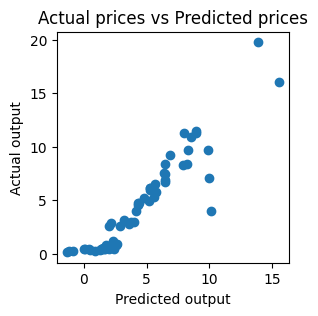

In [37]:
plt.figure(figsize=(3,3))
plt.scatter(X_test_predict,Y_test)
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.title('Actual prices vs Predicted prices')
plt.show()